# Stage 1: (EDA) Exploratory Data Analysis

In [ ]:
#Needed for EDA in Google colab

import pandas as pd

from google.colab import drive

drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [ ]:
#Install tensorflow

!pip install tensorflow==2.9.1



In [ ]:
# import system libs

import os

import time

import shutil

import pathlib

import itertools



# import data handling tools

import cv2

import numpy as np

import pandas as pd

import seaborn as sns

sns.set_style('darkgrid')

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, classification_report



# import Deep learning Libraries

import tensorflow as tf

from tensorflow import keras

from tensorflow.keras.models import Sequential

from tensorflow.keras.optimizers import Adam, Adamax

from tensorflow.keras.metrics import categorical_crossentropy

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization

from tensorflow.keras import regularizers



# Ignore Warnings

import warnings

warnings.filterwarnings("ignore")



print ('modules loaded')

modules loaded


In [ ]:
#Read Data and Store it in a dataframe

# Generate data paths with labels

#Use your own dataset path in Google drive

data_dir = '/content/drive/MyDrive/CAPSTONE_PROJECT/CapstoneData'

filepaths = []

labels = []



folds = os.listdir(data_dir)

for fold in folds:

    foldpath = os.path.join(data_dir, fold)

    filelist = os.listdir(foldpath)

    for file in filelist:

        fpath = os.path.join(foldpath, file)

        filepaths.append(fpath)

        labels.append(fold)

# Concatenate data paths with labels into one dataframe

Fseries = pd.Series(filepaths, name= 'filepaths')

Lseries = pd.Series(labels, name='labels')

df = pd.concat([Fseries, Lseries], axis= 1)

In [ ]:
#EDA Step 1:How is the data distribution

df.head(5)

,filepaths,labels
0,/content/drive/MyDrive/CAPSTONE_PROJECT/Capsto...,frames
1,/content/drive/MyDrive/CAPSTONE_PROJECT/Capsto...,frames
2,/content/drive/MyDrive/CAPSTONE_PROJECT/Capsto...,frames
3,/content/drive/MyDrive/CAPSTONE_PROJECT/Capsto...,frames
4,/content/drive/MyDrive/CAPSTONE_PROJECT/Capsto...,frames


In [ ]:
df.tail(5)

,filepaths,labels
995,/content/drive/MyDrive/CAPSTONE_PROJECT/Capsto...,masks
996,/content/drive/MyDrive/CAPSTONE_PROJECT/Capsto...,masks
997,/content/drive/MyDrive/CAPSTONE_PROJECT/Capsto...,masks
998,/content/drive/MyDrive/CAPSTONE_PROJECT/Capsto...,masks
999,/content/drive/MyDrive/CAPSTONE_PROJECT/Capsto...,masks


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   filepaths  1000 non-null   object
 1   labels     1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB


# EDA Question 1: (Read & Display Images)

(<matplotlib.image.AxesImage at 0x7e43c16411b0>,
 Text(0.5, 1.0, 'Original image\n Lesion Masks'))

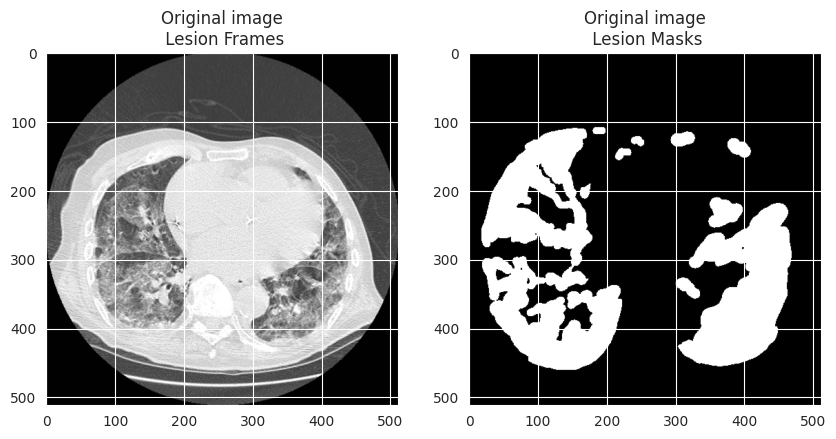

In [ ]:
#EDA Q1: How do images from different classes look like (Read and Display Images)

import cv2

import matplotlib.pyplot as plt

%matplotlib inline

img_path_1 = '/content/drive/MyDrive/CAPSTONE_PROJECT/CapstoneData/frames/bjorke_1.png'

img_1 = cv2.imread(img_path_1)

img_path_2 = '/content/drive/MyDrive/CAPSTONE_PROJECT/CapstoneData/masks/bjorke_2.png'

img_2 = cv2.imread(img_path_2)

plt.figure(figsize=(10, 10))

plt.subplot(121)

plt.imshow(img_1),plt.title('Original image\n Lesion Frames')

plt.subplot(122)

plt.imshow(img_2),plt.title('Original image\n Lesion Masks')

#################################################################

# EDA Question 2: Geometrical transformations

(<matplotlib.image.AxesImage at 0x7e4323d428c0>,
 Text(0.5, 1.0, 'Transposed image\n Lesion Masks'))

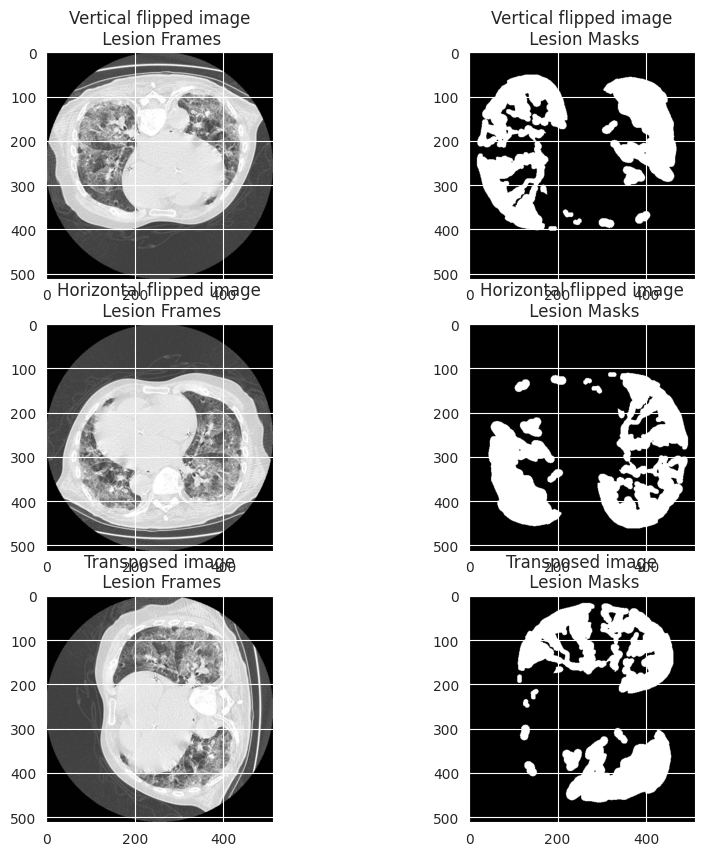

In [ ]:
#EDA Q2: How does the images from different classes look like with geometrical transformations (vertical flipping, horizontal flipping, transposing)

import cv2

import matplotlib.pyplot as plt

%matplotlib inline



img_path_1 = '/content/drive/MyDrive/CAPSTONE_PROJECT/CapstoneData/frames/bjorke_1.png'

img_1 = cv2.imread(img_path_1)

img_path_2 = '/content/drive/MyDrive/CAPSTONE_PROJECT/CapstoneData/masks/bjorke_2.png'

img_2 = cv2.imread(img_path_2)



#Basic image manipulation (rotating/flipping/transpose)

flip_img_v1=cv2.flip(img_1,0) # vertical flip

flip_img_v2=cv2.flip(img_2,0) # vertical flip

#horizontal flip

flip_img_h1=cv2.flip(img_1,1) # horizontal flip

flip_img_h2=cv2.flip(img_2,1) # horizontal flip

#transpose

transp_img_1=cv2.transpose(img_1,1) # transpose

transp_img_2=cv2.transpose(img_2,1) # transpose



plt.figure(figsize=(10,10))

plt.subplot(321)

plt.imshow(flip_img_v1),plt.title('Vertical flipped image\n Lesion Frames')

plt.subplot(322)

plt.imshow(flip_img_v2),plt.title('Vertical flipped image\n Lesion Masks')

plt.subplot(323)

plt.imshow(flip_img_h1), plt.title('Horizontal flipped image\n Lesion Frames')

plt.subplot(324)

plt.imshow(flip_img_h2), plt.title('Horizontal flipped image\n Lesion Masks')

plt.subplot(325)

plt.imshow(transp_img_1),plt.title('Transposed image\n Lesion Frames')

plt.subplot(326)

plt.imshow(transp_img_2),plt.title('Transposed image\n Lesion Masks')

#################################################################

# EDA Question 3: Noising & Denoising operations

(<Axes: title={'center': 'Blurred image(d=6)\n Lesion Masks'}>,
 Text(0.5, 1.0, 'Blurred image(d=6)\n Lesion Masks'))

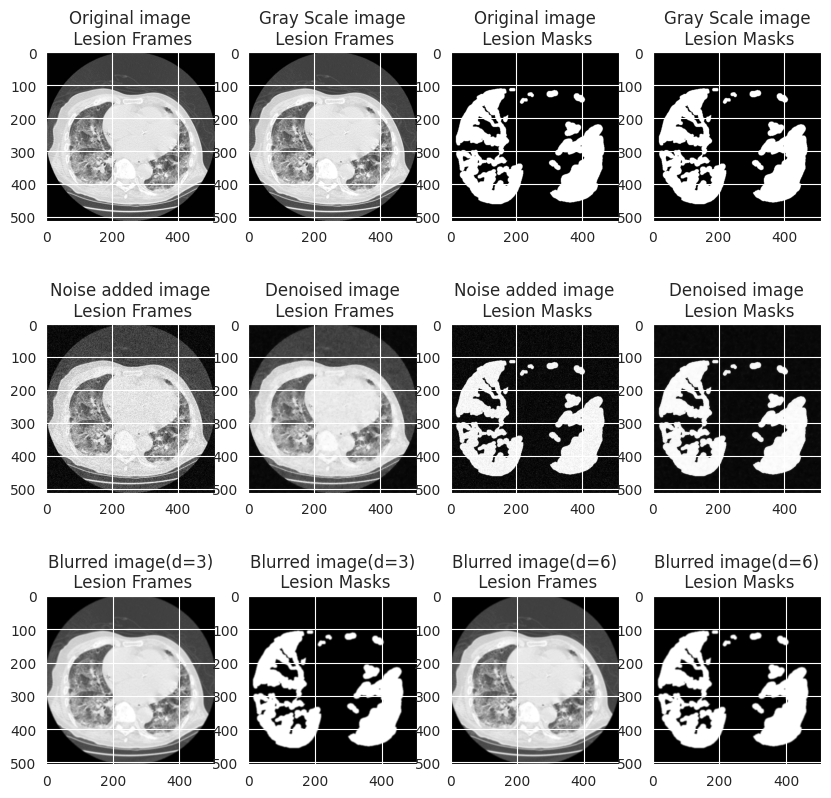

In [ ]:
################################################################

#EDA Q3: What is impact of noising and denoising operations on image #quality (aka Colour and Texture Analysis)

#Conversion to Gray scale image needed for colour and texture analysis

import cv2

import numpy as np

import matplotlib.pyplot as plt

import skimage

import skimage.color as skic

import skimage.filters as skif

import skimage.data as skid

import skimage.util as sku

%matplotlib inline



img_path_1 = '/content/drive/MyDrive/CAPSTONE_PROJECT/CapstoneData/frames/bjorke_1.png'

img_1 = cv2.imread(img_path_1)

img_path_2 = '/content/drive/MyDrive/CAPSTONE_PROJECT/CapstoneData/masks/bjorke_2.png'

img_2 = cv2.imread(img_path_2)



#gray scale conversion

img_1_gray = skic.rgb2gray(img_1)

img_2_gray = skic.rgb2gray(img_2)



# We add Gaussian noise and denoise using denoise_tv_bregman approach

#for img_1 and img_2

img_1_n = sku.random_noise(skic.rgb2gray(img_1))

img_1_d = skimage.restoration.denoise_tv_bregman(img_1_n, 5.)

img_2_n = sku.random_noise(skic.rgb2gray(img_2))

img_2_d = skimage.restoration.denoise_tv_bregman(img_2_n, 5.)



#Noise reduction using Gaussian Blur

d=3

img_1_blur3 = cv2.GaussianBlur(skic.rgb2gray(img_1), (2*d+1, 2*d+1), -1)[d:-d,d:-d]

img_2_blur3 = cv2.GaussianBlur(skic.rgb2gray(img_2), (2*d+1, 2*d+1), -1)[d:-d,d:-d]

img_1_blur6 = cv2.GaussianBlur(skic.rgb2gray(img_1), (2*d+1, 2*d+1), -1)[d:-d,d:-d]

img_2_blur6 = cv2.GaussianBlur(skic.rgb2gray(img_2), (2*d+1, 2*d+1), -1)[d:-d,d:-d]



plt.figure(figsize=(10,10))

#VisualisingGray scale images visualisation

plt.subplot(341), plt.imshow(img_1),plt.title('Original image\n Lesion Frames')

plt.subplot(342), plt.imshow(img_1_gray, cmap = 'gray'),plt.title('Gray Scale image\n Lesion Frames')

plt.subplot(343), plt.imshow(img_2),plt.title('Original image\n Lesion Masks')

plt.subplot(344), plt.imshow(img_2_gray, cmap = 'gray'),plt.title('Gray Scale image\n Lesion Masks')



#Visualising Noising-Denoising images

plt.subplot(345), plt.imshow(img_1_n,cmap = 'gray'), plt.title('Noise added image\n Lesion Frames')

plt.subplot(346), plt.imshow(img_1_d,cmap = 'gray'),plt.title('Denoised image\n Lesion Frames')

plt.subplot(347), plt.imshow(img_2_n,cmap = 'gray'),plt.title('Noise added image\n Lesion Masks')

plt.subplot(348), plt.imshow(img_2_d,cmap = 'gray'),plt.title('Denoised image\n Lesion Masks')



#Visualising Noise Reduction with Gaussian Blurring

plt.subplot(349), plt.imshow(img_1_blur3,cmap = 'gray'), plt.title('Blurred image(d=3)\n Lesion Frames')

plt.subplot(3,4,10), plt.imshow(img_2_blur3,cmap = 'gray'),plt.title('Blurred image(d=3)\n Lesion Masks')

plt.subplot(3,4,11), plt.imshow(img_1_blur6,cmap = 'gray'),plt.title('Blurred image(d=6)\n Lesion Frames')

plt.subplot(3,4,12), plt.imshow(img_2_blur6,cmap = 'gray'),plt.title('Blurred image(d=6)\n Lesion Masks')

#################################################################

# EDA Question 4: Edges & Corners feature

(<Axes: title={'center': 'Image with Corners\n Lesion Masks'}>,
 Text(0.5, 1.0, 'Image with Corners\n Lesion Masks'))

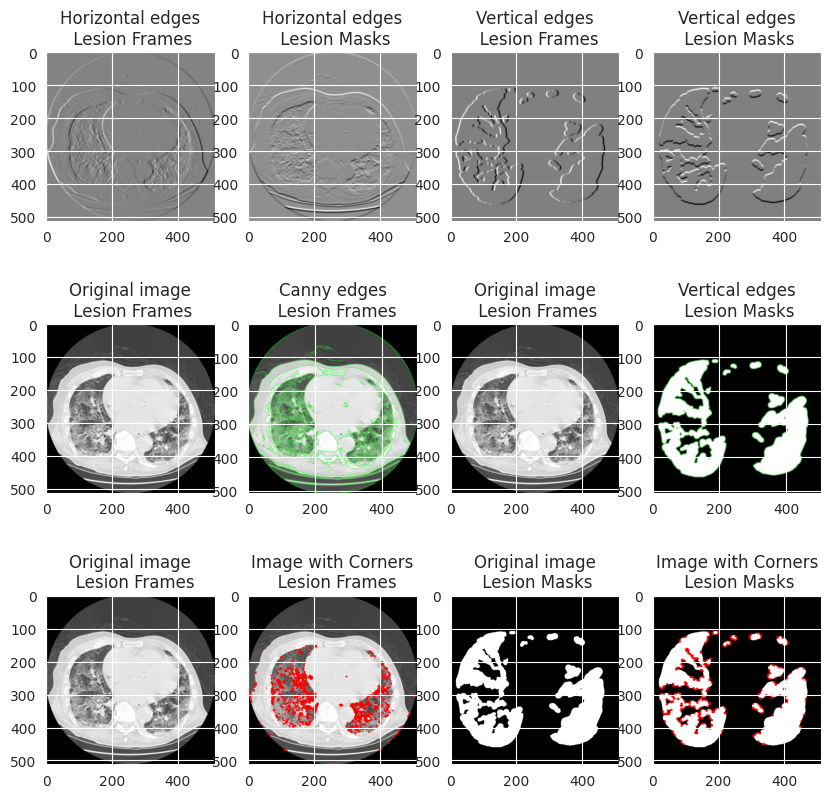

In [ ]:
################################################################
#EDA Q4: How discriminative are the salient features such as edges and #corners for images corresponding to each class

#Conversion to Gray scale image needed for extracting edges and corners

import cv2

import numpy as np

import matplotlib.pyplot as plt

import skimage

import skimage.color as skic

import skimage.filters as skif

import skimage.data as skid

import skimage.util as sku

%matplotlib inline

img_path_1 = '/content/drive/MyDrive/CAPSTONE_PROJECT/CapstoneData/frames/bjorke_1.png'

img_1 = cv2.imread(img_path_1)

img_path_2 = '/content/drive/MyDrive/CAPSTONE_PROJECT/CapstoneData/masks/bjorke_2.png'

img_2 = cv2.imread(img_path_2)

#Sobel edge detector

#edge detector works on gray scale images

sobel_img_1=cv2.cvtColor(img_1,cv2.COLOR_BGR2GRAY)

sobel_img_2=cv2.cvtColor(img_2,cv2.COLOR_BGR2GRAY)

sobelx_img_1 = cv2.Sobel(sobel_img_1,cv2.CV_64F,1,0,ksize=9)

sobely_img_1 = cv2.Sobel(sobel_img_1,cv2.CV_64F,0,1,ksize=9)

sobelx_img_2 = cv2.Sobel(sobel_img_2,cv2.CV_64F,1,0,ksize=9)

sobely_img_2 = cv2.Sobel(sobel_img_2,cv2.CV_64F,0,1,ksize=9)

#Canny edge detector

#threshold selection

th1=30

th2=60

# Canny recommends threshold 2 is 3 times threshold 1

# you could try experimenting with this...

d=3

# gaussian blur

# this takes pixels in edgeresult where edge non-zero and colours them bright green

edgeresult_1=img_1.copy()

edgeresult_1 = cv2.GaussianBlur(edgeresult_1, (2*d+1, 2*d+1), -1)[d:-d,d:-d]

gray_1 = cv2.cvtColor(edgeresult_1, cv2.COLOR_BGR2GRAY)

edge_1 = cv2.Canny(gray_1, th1, th2)

edgeresult_1[edge_1 != 0] = (0, 255, 0)

edgeresult_2=img_2.copy()

edgeresult_2 = cv2.GaussianBlur(edgeresult_2, (2*d+1, 2*d+1), -1)[d:-d,d:-d]

gray_2 = cv2.cvtColor(edgeresult_2, cv2.COLOR_BGR2GRAY)

edge_2 = cv2.Canny(gray_2, th1, th2)

edgeresult_2[edge_2 != 0] = (0, 255, 0)

#Corner detector

#detecting corners for  image_1

harris_1=img_1.copy()

#greyscale it

gray = cv2.cvtColor(harris_1,cv2.COLOR_BGR2GRAY)

gray = np.float32(gray)

blocksize=4 #

kernel_size=3 # sobel kernel: must be odd and fairly small

# run the harris corner detector

dst = cv2.cornerHarris(gray,blocksize,kernel_size,0.05) # parameters are blocksize, Sobel parameter and Harris threshold

#result is dilated for marking the corners, this is visualisation related and just makes them bigger

dst = cv2.dilate(dst,None)

#we then plot these on the input image for visualisation purposes, using bright red

harris_1[dst>0.01*dst.max()]=[0,0,255]

#detecting corners for image_2

harris_2=img_2.copy()

#greyscale it

gray = cv2.cvtColor(harris_2,cv2.COLOR_BGR2GRAY)

gray = np.float32(gray)

blocksize=4 #

kernel_size=3 # sobel kernel: must be odd and fairly small

# run the harris corner detector

dst = cv2.cornerHarris(gray,blocksize,kernel_size,0.05) # parameters are blocksize, Sobel parameter and Harris threshold

#result is dilated for marking the corners, this is visualisation related and just makes them bigger

dst = cv2.dilate(dst,None)

#we then plot these on the input image for visualisation purposes, using bright red

harris_2[dst>0.01*dst.max()]=[0,0,255]



#Visualisng Edges and Corners

plt.figure(figsize=(10,10))

#Visualising Sobel Edges

plt.subplot(341), plt.imshow(sobelx_img_1, cmap = 'gray'),plt.title('Horizontal edges\n Lesion Frames')

plt.subplot(342), plt.imshow(sobely_img_1, cmap = 'gray'),plt.title('Horizontal edges\n Lesion Masks')

plt.subplot(343), plt.imshow(sobelx_img_2, cmap = 'gray'),plt.title('Vertical edges\n  Lesion Frames')

plt.subplot(344), plt.imshow(sobely_img_2, cmap = 'gray'),plt.title('Vertical edges\n Lesion Masks')

#Visualising Canny Edges

plt.subplot(345), plt.imshow(img_1),plt.title('Original image\n Lesion Frames')

plt.subplot(346), plt.imshow(edgeresult_1, cmap = 'gray'),plt.title('Canny edges\n  Lesion Frames')

plt.subplot(347), plt.imshow(img_1),plt.title('Original image\n Lesion Frames')

plt.subplot(348), plt.imshow(edgeresult_2, cmap = 'gray'),plt.title('Vertical edges\n Lesion Masks')

#Visualising Corners

plt.subplot(349), plt.imshow(cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB)),plt.title('Original image\n  Lesion Frames')

plt.subplot(3,4,10), plt.imshow(cv2.cvtColor(harris_1, cv2.COLOR_BGR2RGB)),plt.title('Image with Corners\n  Lesion Frames')

plt.subplot(3,4,11), plt.imshow(cv2.cvtColor(img_2, cv2.COLOR_BGR2RGB)),plt.title('Original image\n Lesion Masks')

plt.subplot(3,4,12), plt.imshow(cv2.cvtColor(harris_2, cv2.COLOR_BGR2RGB)),plt.title('Image with Corners\n Lesion Masks')

#################################################################

# EDA Question 5: Illumination & lighting

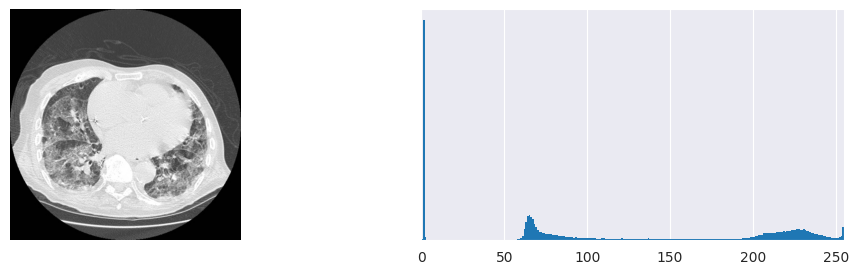

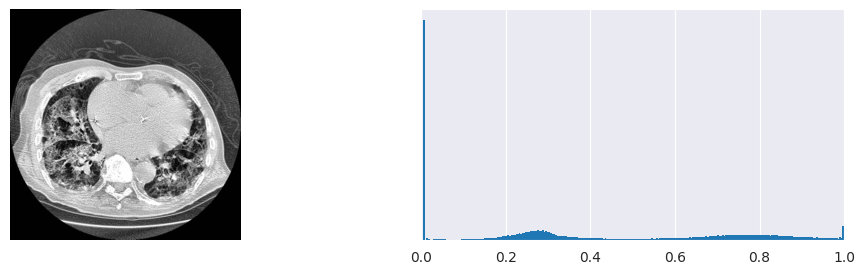

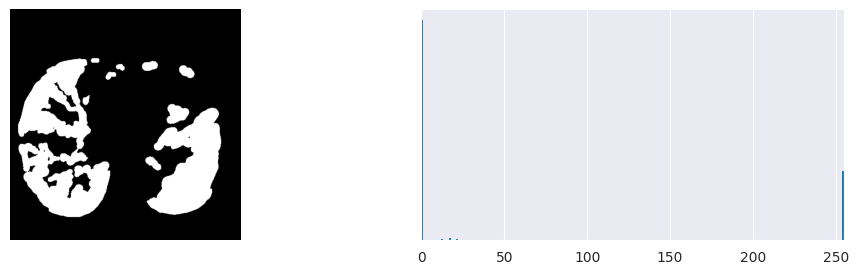

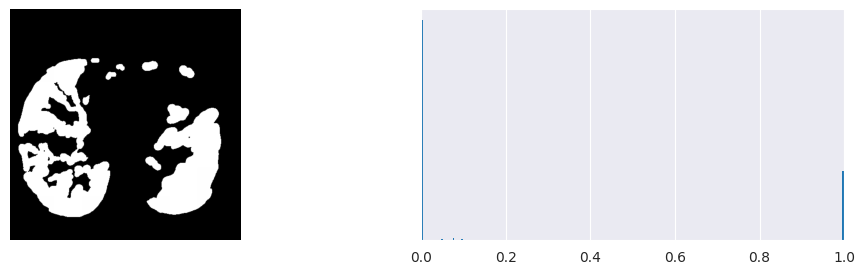

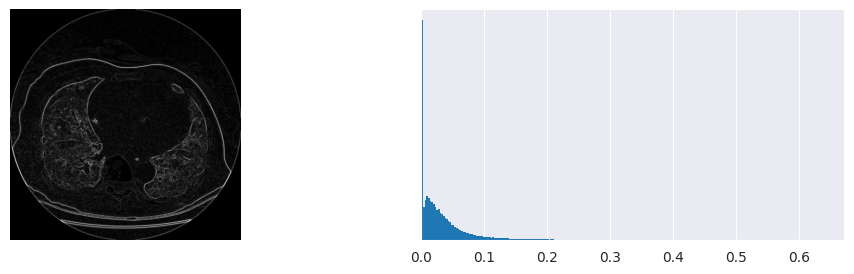

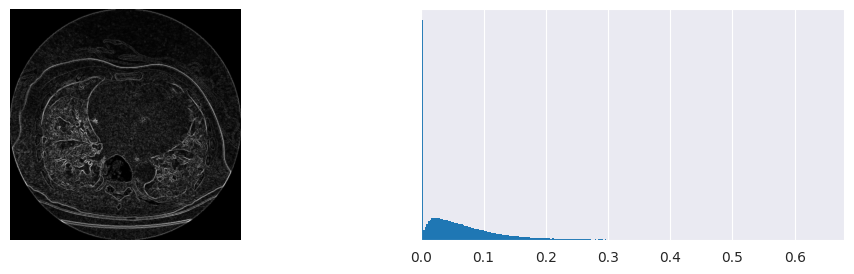

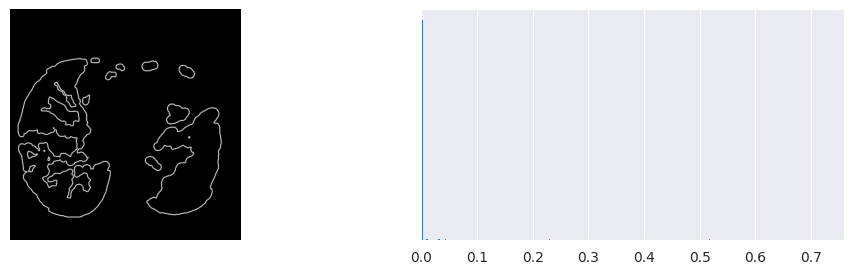

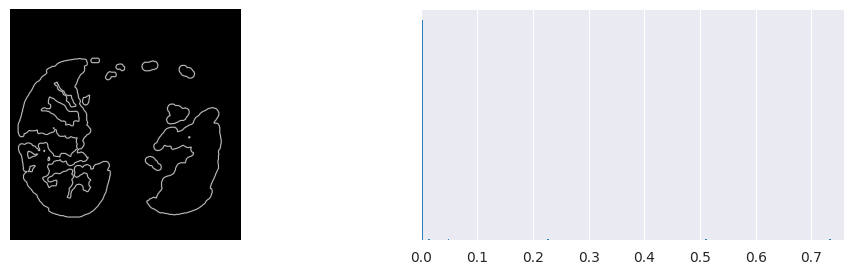

In [ ]:
#EDA Q5: How discriminative are the images from different categories in terms of illumination and lighting artefacts

# i.e. what is the impact of camera effects/exposure of an image

import cv2

import matplotlib.pyplot as plt

import numpy as np

import skimage

import skimage.color as skic

import skimage.filters as skif

import skimage.data as skid

import skimage.util as sku

import skimage.exposure as skie

%matplotlib inline









img_path_1 = '/content/drive/MyDrive/CAPSTONE_PROJECT/CapstoneData/frames/bjorke_1.png'

img_1 = cv2.imread(img_path_1)

img_path_2 = '/content/drive/MyDrive/CAPSTONE_PROJECT/CapstoneData/masks/bjorke_2.png'

img_2 = cv2.imread(img_path_2)



def show(img):

    # Display the image.

    fig, (ax1, ax2) = plt.subplots(1, 2,

                                   figsize=(12, 3))

    ax1.imshow(img, cmap=plt.cm.gray)

    ax1.set_axis_off()



    # Display the histogram.

    ax2.hist(img.ravel(), lw=0, bins=256)

    ax2.set_xlim(0, img.max())

    ax2.set_yticks([])

    plt.show()

show(img_1)

# adaptive histogram equalisation

show(skie.equalize_adapthist(img_1))



show(img_2)

# adaptive histogram equalisation

show(skie.equalize_adapthist(img_2))



#class 1 image

img = skic.rgb2gray(img_1)

sobimg_nheq= skif.sobel(img)

show(sobimg_nheq)

img = skic.rgb2gray(skie.equalize_adapthist(img_1))

sobimg_heq_1 = skif.sobel(img)

show(sobimg_heq_1)

#class 2 image

img = skic.rgb2gray(img_2)

sobimg_nheq= skif.sobel(img)

show(sobimg_nheq)

img = skic.rgb2gray(skie.equalize_adapthist(img_2))

sobimg_heq_2 = skif.sobel(img)

show(sobimg_heq_2)